# 1. Install and Import Dependencies

In [2]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5 & pip install -r requirements.txt

In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

d:\yolo\final project\drowsy\yolo\flaskenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Load Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-10 torch 1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)

Fusing layers... 
YOLOv5s_v6 summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections with Images

In [11]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [8]:
img = 'C:/Users/User/c3.jpg'

In [9]:
results = model(img)
results.print()

image 1/1: 533x800 34 cars, 5 trucks, 1 sheep
Speed: 310.0ms pre-process, 89.1ms inference, 8.0ms NMS per image at shape (1, 3, 448, 640)


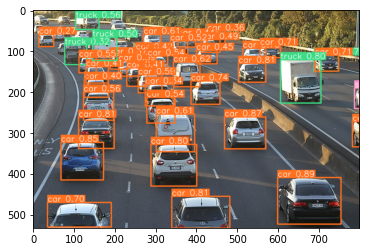

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# 4. Real Time Detections

In [10]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [12]:
import uuid   # Unique identifier
import os
import time

In [15]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [8]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
#         cv2.imwrite(imgname, frame)
        
        # Render to the screen
#         cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
#         time.sleep(2)
        
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
# cap.release()
# cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [16]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.da2d648b-b649-11ec-abe8-1c99571bee10.jpg


In [17]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.dab08499-b649-11ec-ac98-1c99571bee10.jpg
data\images\awake.dab0849a-b649-11ec-bf90-1c99571bee10.jpg
data\images\awake.dab0849b-b649-11ec-888e-1c99571bee10.jpg
data\images\awake.dab0849c-b649-11ec-9b12-1c99571bee10.jpg
data\images\awake.dab0ab90-b649-11ec-9612-1c99571bee10.jpg
data\images\drowsy.dab0ab91-b649-11ec-a9a6-1c99571bee10.jpg
data\images\drowsy.dab0ab92-b649-11ec-a57b-1c99571bee10.jpg
data\images\drowsy.dab0ab93-b649-11ec-a203-1c99571bee10.jpg
data\images\drowsy.dab0ab94-b649-11ec-a448-1c99571bee10.jpg
data\images\drowsy.dab0ab95-b649-11ec-99c2-1c99571bee10.jpg


In [13]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [14]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [20]:
# cd yolov5 -- python train.py

[WinError 2] The system cannot find the file specified: 'yolov5 -- python train.py'
C:\Users\User\Desktop\test 2\YOLO-Drowsiness-Detection-main\yolov5


In [18]:
# !cd yolov5 --data dataset.yml

The system cannot find the path specified.


In [15]:
# !cd yolov5 && python train.py

train: weights=yolov5s.pt, cfg=, data=data\coco128.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   19cc7c6..1a24716  update/restapi -> origin/update/restapi
github:  YOLOv5 is out of date by 8 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
fatal: cannot change to 'C:\Users\User\Desktop\test': No such file or directory
YOLOv5  2022-4-5 torch 1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, mom

In [20]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 13 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.1-97-g2da6866 torch 1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "C:\Users\User\anaconda3\lib\multiprocessing\spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "C:\Users\User\anaconda3\lib\multiprocessing\spawn.py", line 125, in _main
    prepare(preparation_data)
  File "C:\Users\User\anaconda3\lib\multiprocessing\spawn.py", line 236, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\User\anaconda3\lib\multiprocessing\spawn.py", line 287, in _fixup_main_from_path
    main_content = runpy.run_path(main_path,
  File "C:\Users\User\anaconda3\lib\runpy.py", line 268, in run_path
    return _run_module_code(code, init_globals, run_name,
  File "C:\Users\User\anaconda3\lib\runpy.py", line 97, in _run_module_code
    _run_code(code, mod_globals, init_globals,
  File "C:\Users\User\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "D:\yolo\yolov5\train.py", line 41, in <module>
 

In [15]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 22 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
fatal: cannot change to 'D:\yolo\final': No such file or directory
YOLOv5  2022-4-5 torch 1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.

# 6. Load Custom Model

In [16]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp19/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\User/.cache\torch\hub\master.zip
YOLOv5  2022-4-10 torch 1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [11]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [68]:
img = os.path.join('data', 'images', 'y4.jpg')

In [69]:
results = model(img)

In [70]:
results.print()

image 1/1: 408x612 1 awake
Speed: 5.4ms pre-process, 68.9ms inference, 4.0ms NMS per image at shape (1, 3, 448, 640)


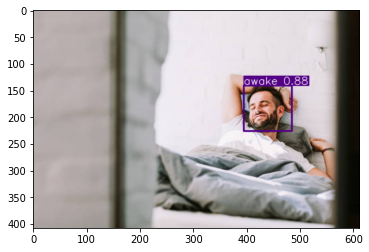

In [71]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

['drowsy_model_april_2022.joblib']

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [34]:
results.print()

image 1/1: 378x478 1 drowsy
Speed: 5.0ms pre-process, 88.3ms inference, 4.0ms NMS per image at shape (1, 3, 512, 640)


In [ ]:
plt.imshow(img)
plt.axis("on")
plt.show()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = os.path.join('data', 'images', 'a2.jpg')
# img = cv2.imread("1.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()